In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import json
from cryptocompy import coin,price
import tqdm
import seaborn as sns
sns.set();

import io,os
import requests
import json
from datetime import datetime
import time
from time import gmtime, strftime

from sklearn import metrics
from fbprophet import Prophet
plt.rcParams["figure.figsize"] = [14,8]
pd.set_option('float_format', '{:f}'.format)

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import datetime
from datetime import datetime as dt
from datetime import timedelta


from tqdm import tqdm_notebook
from livelossplot.keras import PlotLossesCallback


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from xgboost import XGBRegressor
from catboost import CatBoostRegressor, Pool, cv
import catboost
from sklearn.ensemble import RandomForestRegressor

from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
#from sklearn.cross_validation import cross_val_score
#from sklearn.grid_search import GridSearchCV
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(1)

from keras.models import Sequential  
from keras.layers.core import Dense, Activation  
from keras.layers.recurrent import LSTM
from keras.layers.advanced_activations import LeakyReLU

from keras import optimizers
from keras import backend as K

adam = optimizers.Adam(lr=0.01, clipnorm=1.)

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 
def nn_r2_score(y_true, y_pred):
    total_error = K.sum(K.square( y_true - K.mean(y_true) ) )
    residual_error = K.sum(K.square( y_true - y_pred ))
    R_squared = 1 - (residual_error / total_error)
    return -R_squared

NUM_PARALLEL_EXEC_UNITS = 4
os.environ['OMP_NUM_THREADS'] = str(NUM_PARALLEL_EXEC_UNITS)
os.environ["KMP_AFFINITY"] = "granularity=fine,verbose,compact,1,0"
os.environ["KMP_AFFINITY"] = "disabled"

import MySQLdb 
import sshtunnel
from sshtunnel import SSHTunnelForwarder
import pandas as pd

df_coin = pd.DataFrame()
mkt = pd.DataFrame()
ico_prices = pd.DataFrame()

'''
#with SSHTunnelForwarder(('206.189.186.74', 22), ssh_password='crypto1234', ssh_username='aagam', remote_bind_address=('127.0.0.1', 3306)) as server:
conn = MySQLdb.connect(host='tokenmetrics.cluster-cxuzrhvtziar.us-east-1.rds.amazonaws.com', user='admin', passwd='WiG8Rled2cTvZ5JibJui',db='tokenmetrics')

cursor = conn.cursor()

query = ''SELECT * FROM ico_price_daily_summaries;''
data = pd.read_sql_query(query, conn)
df_coin = pd.concat([df_coin,data])

query = ''SELECT * FROM icos;''
data = pd.read_sql_query(query, conn)
mkt = pd.concat([mkt,data])

query = 'SELECT * FROM ico_prices;'
data = pd.read_sql_query(query, conn)
ico_prices = pd.concat([ico_prices,data])

conn.close() 



mkt = mkt.sort_values('ico_market_cap',ascending=False)
coins = mkt['symbol'][:110].tolist()
coins = list(filter(None,coins))
print(coins)'''

Using TensorFlow backend.


"\n#with SSHTunnelForwarder(('206.189.186.74', 22), ssh_password='crypto1234', ssh_username='aagam', remote_bind_address=('127.0.0.1', 3306)) as server:\nconn = MySQLdb.connect(host='tokenmetrics.cluster-cxuzrhvtziar.us-east-1.rds.amazonaws.com', user='admin', passwd='WiG8Rled2cTvZ5JibJui',db='tokenmetrics')\n\ncursor = conn.cursor()\n\nquery = ''SELECT * FROM ico_price_daily_summaries;''\ndata = pd.read_sql_query(query, conn)\ndf_coin = pd.concat([df_coin,data])\n\nquery = ''SELECT * FROM icos;''\ndata = pd.read_sql_query(query, conn)\nmkt = pd.concat([mkt,data])\n\nquery = 'SELECT * FROM ico_prices;'\ndata = pd.read_sql_query(query, conn)\nico_prices = pd.concat([ico_prices,data])\n\nconn.close() \n\n\n\nmkt = mkt.sort_values('ico_market_cap',ascending=False)\ncoins = mkt['symbol'][:110].tolist()\ncoins = list(filter(None,coins))\nprint(coins)"

In [ ]:
BTC - -20%
Other Coins - 10, -5

In [2]:
ico_ids = df_coin['ico_id'][df_coin['ico_symbol'] == 'BTC'].unique().tolist()

In [4]:
ico_prices = pd.DataFrame()

conn = MySQLdb.connect(host='tokenmetrics.cluster-cxuzrhvtziar.us-east-1.rds.amazonaws.com', user='admin', passwd='WiG8Rled2cTvZ5JibJui',db='tokenmetrics')

cursor = conn.cursor()

query = '''SELECT * FROM ico_price_daily_summaries where ico_id =2974;'''
data = pd.read_sql_query(query, conn)
ico_prices = pd.concat([ico_prices,data])

conn.close()

In [5]:
ico_prices = ico_prices[ico_prices['currency'] == 'USD']

In [159]:
h = ico_prices[ico_prices['ico_id'].isin(ico_ids)]

In [175]:
h = h.sort_values('updated_at', ascending=False)
h['price'].iloc[0]

7462.9174804688

In [176]:
final['Price'].iloc[2] = h['price'].loc[0]

In [177]:
final

,weekday,Price,Low,High
ds,,,,
2019-12-02 00:00:00,7462.917480,7462.917480,7462.917480,7462.917480
2019-12-03 00:00:00,Tuesday,7462.917480,122.286611,172.115951
2019-12-04 00:00:00,Wednesday,146.695753,122.959275,172.253240
2019-12-05 00:00:00,Thursday,146.273282,120.986637,170.560910
2019-12-06 00:00:00,Friday,142.759289,118.422451,167.678646
2019-12-07 00:00:00,Saturday,144.013574,119.529981,167.220834
2019-12-08 00:00:00,Sunday,144.050294,117.608578,168.316071
2019-12-09 00:00:00,Monday,143.439830,119.615797,170.321770
2019-12-10 00:00:00,Tuesday,142.512741,117.129665,166.860089


In [4]:
coin = 'ETH'

In [8]:
df = ico_prices

In [9]:
#df = df_coin[df_coin['ico_symbol'] == coin][df_coin['currency'] == 'USD']
df = df.drop_duplicates(subset='date').sort_values(by='date')

In [11]:
df['date'] = pd.to_datetime(df['date'])
df = df[['close','date']]
df.columns = ['y','ds']
df = df.sort_values(by='ds')

In [12]:
df

,y,ds
0,0.003360,2019-05-09
1,0.003140,2019-05-10
2,0.003780,2019-05-11
3,0.004600,2019-05-12
4,0.005300,2019-05-13
5,0.008680,2019-05-14
6,0.007800,2019-05-15
7,0.009560,2019-05-16
8,0.010870,2019-05-17
9,0.014550,2019-05-18


In [13]:
k = [i for i in range(10,10*10+1,10)]
k

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [14]:
if len(df) > 360:
    t = [i for i in range(10,10*12+1,10)]
elif len(df)>= 30:
    t = int(len(df)/30)
    t = [i for i in range(10,10*t+1,10)]

In [15]:
t = int(200/30)
[i for i in range(10,10*t+1,10)]

[10, 20, 30, 40, 50, 60]

In [16]:
t

6

In [17]:
t1 = 0
t2 = 0
for change in [0.9,0.8,0.75,0.65,0.35]:
    days = 10
    #t = [100,90,80,60,30]
    if len(df) > 360:
        t = [i for i in range(10,10*t+1,10)]
    elif len(df)>= 30:
        t = int(len(df)/30)
        t = [i for i in range(10,10*t+1,10)]
        
    pred = pd.DataFrame()
    for te in t:
        data = df[['y','ds']][:-te]
        if te == 10:
            true = df['y'][-10:]
        else:
            true = df['y'][-te:-(te-days)]

        model = Prophet(changepoint_prior_scale=0.7,n_changepoints=25, daily_seasonality=False,yearly_seasonality=False,
                        changepoint_range=change).fit(data)

        #data_forecast = data['ds'] + pd.Timedelta(30, unit='days')
        y = pd.date_range(start=data['ds'].iloc[-1],periods=10)
        data_forecast = pd.concat([data['ds'],pd.Series(y)[1:]])

        data_forecast = pd.DataFrame(data_forecast)
        data_forecast.columns = ['ds']
        forecast = model.predict(data_forecast)
        forecast['yhat'] = np.where(forecast['yhat']<0,0.000001,forecast['yhat'])
        forecast['yhat_lower'] = np.where(forecast['yhat_lower']<0,0.000001,forecast['yhat_lower'])
        forecast['yhat_upper'] = np.where(forecast['yhat_upper']<0,0.000001,forecast['yhat_upper'])
        #model.plot(forecast);
        y = pd.DataFrame()
        y['True'] = true
        y['Forecasted'] = forecast['yhat'].iloc[-10:].values
        score = []
        for i in range(len(y)):
            if y['True'].iloc[i] > y['Forecasted'].iloc[i]:
                score.append(y['Forecasted'].iloc[i] / y['True'].iloc[i])
            else:
                score.append(y['True'].iloc[i] / y['Forecasted'].iloc[i])
        y['RMSE'] = np.sqrt(metrics.mean_squared_error(y['True'],y['Forecasted']))
        y['MAE'] = metrics.mean_absolute_error(y['True'],y['Forecasted'])
        y['Accuracy'] =score
        y['t'] = te
        pred = pd.concat([pred,y])

    res = pred[['RMSE','MAE','Accuracy']].groupby([pred['t']]).mean()
    #res.index = pd.Series(['Last month','2nd last month','3rd last month']) + '-2019'
    res = pd.DataFrame(res)
    print(res)
    if t1 == 0 and t2 == 0:
        t1 = change
        t2 = res['Accuracy'].mean()

    else:
        if t2 < res['Accuracy'].mean():
            t2 = res['Accuracy'].mean()
            t1 = change


       RMSE      MAE  Accuracy
t                             
10 0.011884 0.010939  0.680269
20 0.007007 0.004882  0.799090
30 0.000711 0.000522  0.965508
40 0.001140 0.001086  0.928069
50 0.002356 0.002181  0.866394
60 0.005018 0.004950  0.666860
70 0.000873 0.000799  0.931549
       RMSE      MAE  Accuracy
t                             
10 0.015003 0.013799  0.596146
20 0.006725 0.004748  0.803035
30 0.000890 0.000793  0.948638
40 0.000781 0.000713  0.951448
50 0.000887 0.000759  0.946495
60 0.004706 0.004630  0.688751
70 0.000951 0.000892  0.923903
       RMSE      MAE  Accuracy
t                             
10 0.015273 0.014036  0.589455
20 0.006460 0.004631  0.806325
30 0.000652 0.000555  0.963351
40 0.000480 0.000350  0.975804
50 0.001318 0.001210  0.914245
60 0.004520 0.004441  0.701639
70 0.000962 0.000907  0.922681
       RMSE      MAE  Accuracy
t                             
10 0.016259 0.014902  0.565304
20 0.007075 0.004901  0.799121
30 0.001083 0.000917  0.938945
40 0.001

In [18]:
t

[10, 20, 30, 40, 50, 60, 70]

In [62]:
t1 = 0.60
t1

0.6

In [59]:
t2

0.8390712909676612

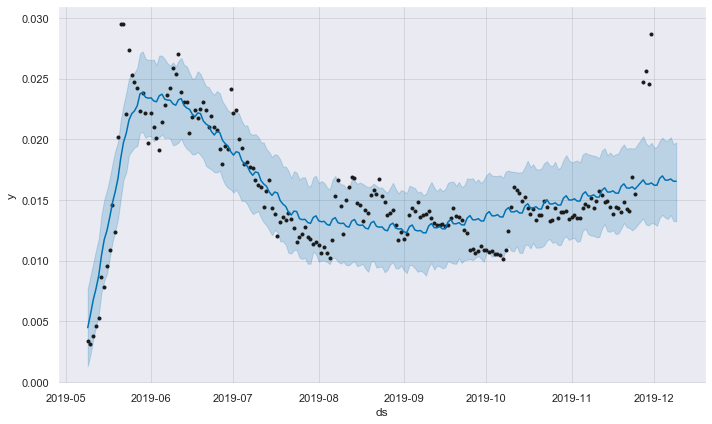

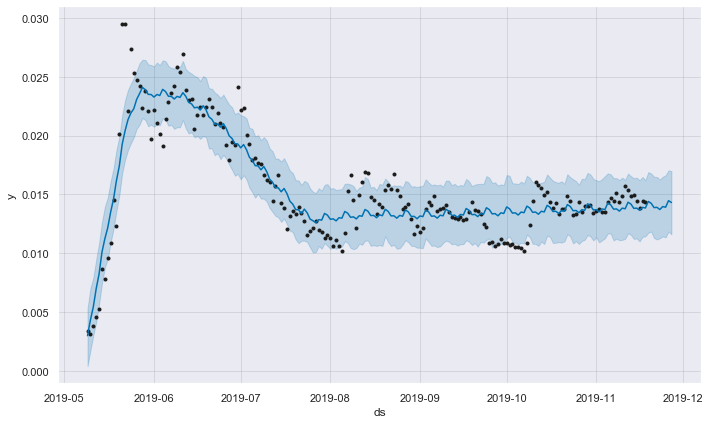

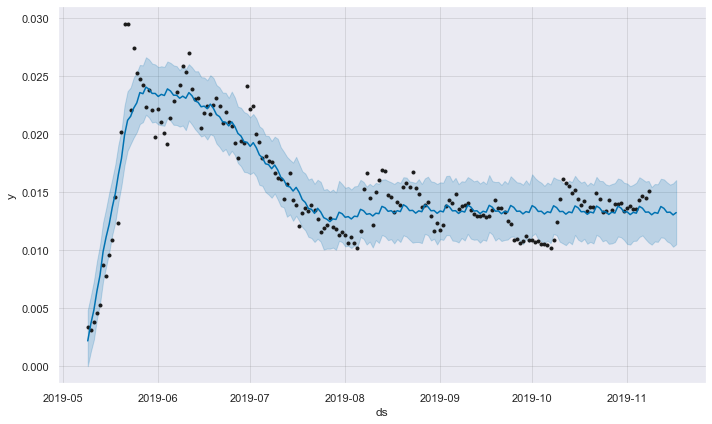

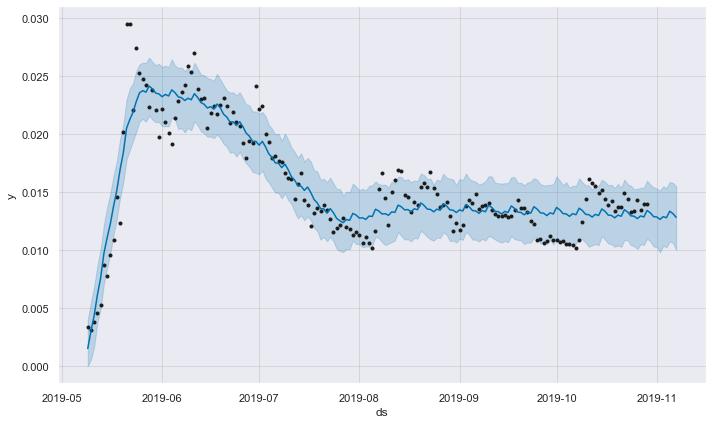

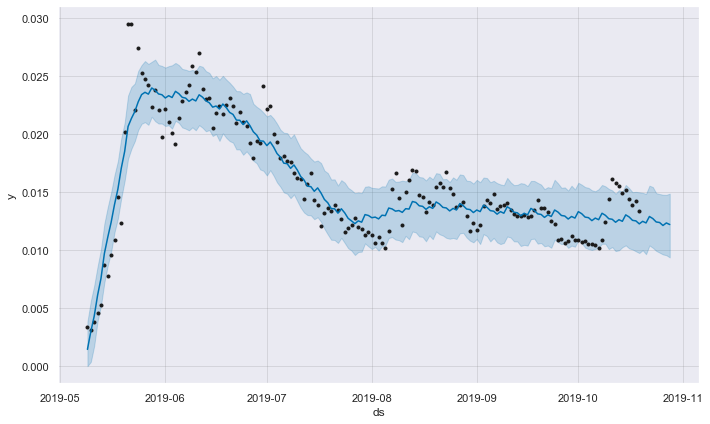

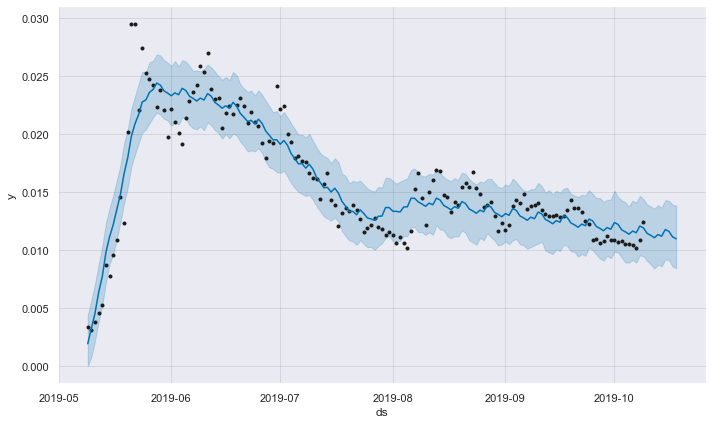

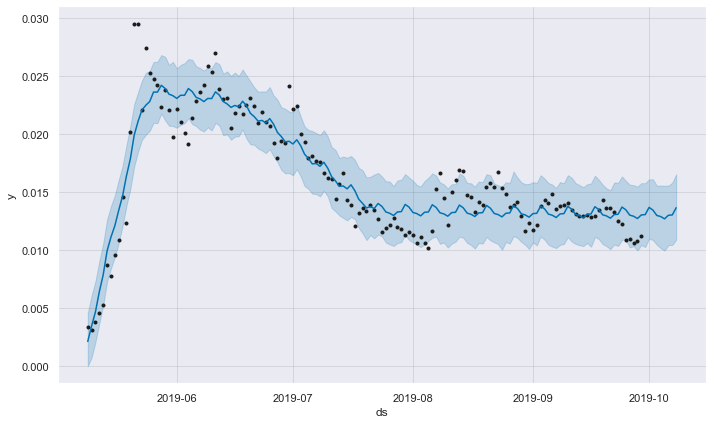

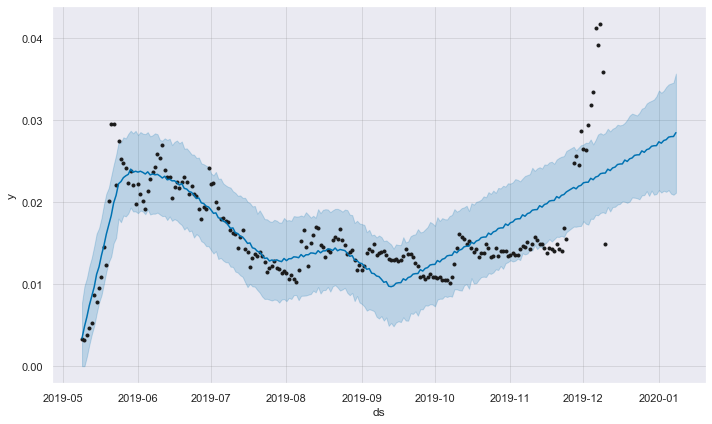

In [63]:
days = 10
#t = [100,90,80,70,60,50,40,30,20,10]
pred = pd.DataFrame()
for te in t:
    data = df[['y','ds']][:-te]
    if te == 10:
        true = df['y'][-10:]
    else:
        true = df['y'][-te:-(te-days)]

    model = Prophet(changepoint_prior_scale=0.3,n_changepoints=25, daily_seasonality=False,yearly_seasonality=False,
                        changepoint_range=t1).fit(data)

    #data_forecast = data['ds'] + pd.Timedelta(30, unit='days')
    y = pd.date_range(start=data['ds'].iloc[-1],periods=10)
    data_forecast = pd.concat([data['ds'],pd.Series(y)[1:]])


    data_forecast = pd.DataFrame(data_forecast)
    data_forecast.columns = ['ds']
    forecast = model.predict(data_forecast)
    forecast['yhat'] = np.where(forecast['yhat']<0,0.000001,forecast['yhat'])
    forecast['yhat_lower'] = np.where(forecast['yhat_lower']<0,0.000001,forecast['yhat_lower'])
    forecast['yhat_upper'] = np.where(forecast['yhat_upper']<0,0.000001,forecast['yhat_upper'])
    model.plot(forecast);
    y = pd.DataFrame()
    y['True'] = true
    y['Forecasted'] = forecast['yhat'].iloc[-10:].values
    score = []
    for i in range(len(y)):
        if y['True'].iloc[i] > y['Forecasted'].iloc[i]:
            score.append(y['Forecasted'].iloc[i] / y['True'].iloc[i])
        else:
            score.append(y['True'].iloc[i] / y['Forecasted'].iloc[i])
    y['RMSE'] = np.sqrt(metrics.mean_squared_error(y['True'],y['Forecasted']))
    y['MAE'] = metrics.mean_absolute_error(y['True'],y['Forecasted'])
    y['Accuracy'] = score
    y['t'] = te
    pred = pd.concat([pred,y])

model = Prophet(changepoint_prior_scale=0.7,n_changepoints=25, daily_seasonality=False,yearly_seasonality=False,
                        changepoint_range=t1).fit(df)
#data_forecast = df['ds'] + pd.Timedelta(30, unit='days')
y = pd.date_range(start=df['ds'].iloc[-1],periods=30)
data_forecast = pd.concat([df['ds'],pd.Series(y)[1:]])

#print(df['ds'])
#print(data_forecast) 
data_forecast = pd.DataFrame(data_forecast)
data_forecast.columns = ['ds']
forecast = model.predict(data_forecast)
forecast['yhat'] = np.where(forecast['yhat']<0,0.000001,forecast['yhat'])
forecast['yhat_lower'] = np.where(forecast['yhat_lower']<0,0.000001,forecast['yhat_lower'])
forecast['yhat_upper'] = np.where(forecast['yhat_upper']<0,0.000001,forecast['yhat_upper'])
model.plot(forecast); 

res = pred[['RMSE','MAE','Accuracy']].groupby([pred['t']]).mean()
#res.index = pd.Series(['Last month','2nd last month','3rd last month']) + '-2019'
#res.index = pd.Series([str(df['ds'].iloc[-30])[:10]+'-'+str(df['ds'].iloc[-1])[:10],  str(df['ds'].iloc[-60])[:10]+'-'+str(df['ds'].iloc[-30])[:10] , str(df['ds'].iloc[-90])[:10]+'-'+str(df['ds'].iloc[-60])[:10]])
#res = pd.DataFrame(res)

forecast = forecast.sort_values('ds')
final = forecast[['ds']].iloc[-30:]
final['weekday'] = final['ds'].dt.weekday
final['weekday'] = final['weekday'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
final[['Price','Low','High']] = forecast[['yhat','yhat_lower','yhat_upper']].iloc[-30:]
final.set_index('ds',inplace=True)

In [64]:
final

,weekday,Price,Low,High
ds,,,,
2019-12-10,Tuesday,0.023542,0.018644,0.028416
2019-12-11,Wednesday,0.024015,0.019406,0.028944
2019-12-12,Thursday,0.023843,0.018861,0.028624
2019-12-13,Friday,0.024168,0.019404,0.028948
2019-12-14,Saturday,0.024269,0.019434,0.029088
2019-12-15,Sunday,0.024582,0.019704,0.029434
2019-12-16,Monday,0.024645,0.019784,0.029354
2019-12-17,Tuesday,0.024656,0.020098,0.029424
2019-12-18,Wednesday,0.025128,0.020042,0.029659


In [24]:
forecast = forecast.sort_values('ds')
final = forecast[['ds']].iloc[-30:]
final['weekday'] = final['ds'].dt.weekday
final['weekday'] = final['weekday'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
final[['Price','Low','High']] = forecast[['yhat','yhat_lower','yhat_upper']].iloc[-30:]
final.set_index('ds',inplace=True)

In [45]:
if len(res)<=1:
    ind = [str(df['ds'].iloc[-30])[:10]+'-'+str(df['ds'].iloc[-1])[:10]]
else:
    ind = [str(df['ds'].iloc[-30])[:10]+'-'+str(df['ds'].iloc[-1])[:10]]
    for i in range(2,len(res)+1):
        ind.append(str(df['ds'].iloc[-30*i])[:10]+'-'+str(df['ds'].iloc[-30*(i-1)])[:10])

In [46]:
ind

['2019-11-02-2019-12-03',
 '2019-10-03-2019-11-02',
 '2019-09-03-2019-10-03',
 '2019-08-04-2019-09-03',
 '2019-07-05-2019-08-04',
 '2019-06-05-2019-07-05',
 '2019-05-06-2019-06-05',
 '2019-04-06-2019-05-06',
 '2019-03-07-2019-04-06',
 '2019-02-05-2019-03-07',
 '2019-01-06-2019-02-05',
 '2018-12-07-2019-01-06']

In [47]:
res.iloc[::-1]

,RMSE,MAE,Accuracy
t,,,
120,11.795473,9.817290,0.957232
110,9.810747,8.143250,0.959675
100,9.901590,8.594771,0.953321
90,25.084818,24.061951,0.863917
80,53.939279,50.158111,0.757027
70,10.526621,7.549574,0.959418
60,12.838341,10.228544,0.944561
50,5.117295,4.354621,0.975668
40,10.444921,9.560475,0.947110


In [144]:
final

,weekday,Price,Low,High
ds,,,,
2019-12-02,Monday,148.073173,125.953282,174.001750
2019-12-03,Tuesday,147.146085,122.286611,172.115951
2019-12-04,Wednesday,146.695753,122.959275,172.253240
2019-12-05,Thursday,146.273282,120.986637,170.560910
2019-12-06,Friday,142.759289,118.422451,167.678646
2019-12-07,Saturday,144.013574,119.529981,167.220834
2019-12-08,Sunday,144.050294,117.608578,168.316071
2019-12-09,Monday,143.439830,119.615797,170.321770
2019-12-10,Tuesday,142.512741,117.129665,166.860089


In [145]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-02-04,111.420770,88.104935,137.643337,111.420770,111.420770,0.514390,0.514390,0.514390,0.514390,0.514390,0.514390,0.000000,0.000000,0.000000,111.935160
1,2019-02-05,112.637629,86.961829,137.221753,112.637629,112.637629,0.249208,0.249208,0.249208,0.249208,0.249208,0.249208,0.000000,0.000000,0.000000,112.886837
2,2019-02-06,113.854488,89.559150,139.228686,113.854488,113.854488,0.460783,0.460783,0.460783,0.460783,0.460783,0.460783,0.000000,0.000000,0.000000,114.315271
3,2019-02-07,115.071347,92.545826,139.791661,115.071347,115.071347,0.700218,0.700218,0.700218,0.700218,0.700218,0.700218,0.000000,0.000000,0.000000,115.771565
4,2019-02-08,116.288206,90.307179,138.737338,116.288206,116.288206,-2.151869,-2.151869,-2.151869,-2.151869,-2.151869,-2.151869,0.000000,0.000000,0.000000,114.136337
5,2019-02-09,117.505066,91.972617,142.579539,117.505066,117.505066,-0.235678,-0.235678,-0.235678,-0.235678,-0.235678,-0.235678,0.000000,0.000000,0.000000,117.269387
6,2019-02-10,118.721925,95.221305,143.587064,118.721925,118.721925,0.462948,0.462948,0.462948,0.462948,0.462948,0.462948,0.000000,0.000000,0.000000,119.184873
7,2019-02-11,119.938783,96.748775,143.889407,119.938783,119.938783,0.514390,0.514390,0.514390,0.514390,0.514390,0.514390,0.000000,0.000000,0.000000,120.453173
8,2019-02-12,121.155640,96.735314,145.348084,121.155640,121.155640,0.249208,0.249208,0.249208,0.249208,0.249208,0.249208,0.000000,0.000000,0.000000,121.404848
9,2019-02-13,122.372498,98.322648,148.436503,122.372498,122.372498,0.460783,0.460783,0.460783,0.460783,0.460783,0.460783,0.000000,0.000000,0.000000,122.833281


In [ ]:
for coin in coins:
    #df = price.get_historical_data(coin, 'BTC', 'day', aggregate=1, limit=2000)
    df = df_coin[df_coin['ico_symbol'] == coin][df_coin['currency'] == 'USD']
    df = df.drop_duplicates(subset='date').sort_values(by='date')
    if len(df) > 0:
        df = df[df['close']!=0]
    if len(df) > 150:
        #df['Date'] = df['time'].apply(lambda x: x[:10])
        df['date'] = pd.to_datetime(df['date'])
        df = df[['close','date']]
        df.columns = ['y','ds']
        df = df.sort_values(by='ds')
        t1 = 0
        t2 = 0
        for change in [0.9,0.8,0.75,0.65,0.35]:
            days = 30
            t = [90,60,30]
            pred = pd.DataFrame()
            for te in t:
                data = df[['y','ds']][:-te]
                if te == 30:
                    true = df['y'][-30:]
                else:
                    true = df['y'][-te:-(te-days)]

                model = Prophet(changepoint_prior_scale=0.7,n_changepoints=25, daily_seasonality=False,yearly_seasonality=False,
                                changepoint_range=change).fit(data)

                #data_forecast = data['ds'] + pd.Timedelta(30, unit='days')
                y = pd.date_range(start=data['ds'].iloc[-1],periods=30)
                data_forecast = pd.concat([data['ds'],pd.Series(y)[1:]])

                data_forecast = pd.DataFrame(data_forecast)
                data_forecast.columns = ['ds']
                forecast = model.predict(data_forecast)
                forecast['yhat'] = np.where(forecast['yhat']<0,0.000001,forecast['yhat'])
                forecast['yhat_lower'] = np.where(forecast['yhat_lower']<0,0.000001,forecast['yhat_lower'])
                forecast['yhat_upper'] = np.where(forecast['yhat_upper']<0,0.000001,forecast['yhat_upper'])
                #model.plot(forecast);
                y = pd.DataFrame()
                y['True'] = true
                y['Forecasted'] = forecast['yhat'].iloc[-30:].values
                score = []
                for i in range(len(y)):
                    if y['True'].iloc[i] > y['Forecasted'].iloc[i]:
                        score.append(y['Forecasted'].iloc[i] / y['True'].iloc[i])
                    else:
                        score.append(y['True'].iloc[i] / y['Forecasted'].iloc[i])
                y['RMSE'] = np.sqrt(metrics.mean_squared_error(y['True'],y['Forecasted']))
                y['MAE'] = metrics.mean_absolute_error(y['True'],y['Forecasted'])
                y['Accuracy'] =score
                y['t'] = te
                pred = pd.concat([pred,y])

            res = pred[['RMSE','MAE','Accuracy']].groupby([pred['t']]).mean()
            res.index = pd.Series(['Last month','2nd last month','3rd last month']) + '-2019'
            res = pd.DataFrame(res)
            print(res)
            if t1 == 0 and t2 == 0:
                t1 = change
                t2 = res['Accuracy'].mean()

            else:
                if t2 < res['Accuracy'].mean():
                    t2 = res['Accuracy'].mean()
                    t1 = change
                    
        #with open("param.csv", "a") as myfile:
        #    myfile.write('\n'+coin+',0.7,25,True,'+str(t1))

        days = 30
        t = [90,60,30]
        pred = pd.DataFrame()
        for te in t:
            data = df[['y','ds']][:-te]
            if te == 30:
                true = df['y'][-30:]
            else:
                true = df['y'][-te:-(te-days)]

            model = Prophet(changepoint_prior_scale=0.7,n_changepoints=25, daily_seasonality=False,yearly_seasonality=False,
                                changepoint_range=t1).fit(data)

            #data_forecast = data['ds'] + pd.Timedelta(30, unit='days')
            y = pd.date_range(start=data['ds'].iloc[-1],periods=30)
            data_forecast = pd.concat([data['ds'],pd.Series(y)[1:]])


            data_forecast = pd.DataFrame(data_forecast)
            data_forecast.columns = ['ds']
            forecast = model.predict(data_forecast)
            forecast['yhat'] = np.where(forecast['yhat']<0,0.000001,forecast['yhat'])
            forecast['yhat_lower'] = np.where(forecast['yhat_lower']<0,0.000001,forecast['yhat_lower'])
            forecast['yhat_upper'] = np.where(forecast['yhat_upper']<0,0.000001,forecast['yhat_upper'])
            #model.plot(forecast);
            y = pd.DataFrame()
            y['True'] = true
            y['Forecasted'] = forecast['yhat'].iloc[-30:].values
            score = []
            for i in range(len(y)):
                if y['True'].iloc[i] > y['Forecasted'].iloc[i]:
                    score.append(y['Forecasted'].iloc[i] / y['True'].iloc[i])
                else:
                    score.append(y['True'].iloc[i] / y['Forecasted'].iloc[i])
            y['RMSE'] = np.sqrt(metrics.mean_squared_error(y['True'],y['Forecasted']))
            y['MAE'] = metrics.mean_absolute_error(y['True'],y['Forecasted'])
            y['Accuracy'] = score
            y['t'] = te
            pred = pd.concat([pred,y])

        model = Prophet(changepoint_prior_scale=0.7,n_changepoints=25, daily_seasonality=False,yearly_seasonality=False,
                                changepoint_range=t1).fit(df)
        #data_forecast = df['ds'] + pd.Timedelta(30, unit='days')
        y = pd.date_range(start=df['ds'].iloc[-1],periods=30)
        data_forecast = pd.concat([df['ds'],pd.Series(y)[1:]])

        #print(df['ds'])
        #print(data_forecast) 
        data_forecast = pd.DataFrame(data_forecast)
        data_forecast.columns = ['ds']
        forecast = model.predict(data_forecast)
        forecast['yhat'] = np.where(forecast['yhat']<0,0.000001,forecast['yhat'])
        forecast['yhat_lower'] = np.where(forecast['yhat_lower']<0,0.000001,forecast['yhat_lower'])
        forecast['yhat_upper'] = np.where(forecast['yhat_upper']<0,0.000001,forecast['yhat_upper'])
        #model.plot(forecast); 

        res = pred[['RMSE','MAE','Accuracy']].groupby([pred['t']]).mean()
        #res.index = pd.Series(['Last month','2nd last month','3rd last month']) + '-2019'
        res.index = pd.Series([str(df['ds'].iloc[-30])[:10]+'-'+str(df['ds'].iloc[-1])[:10],  str(df['ds'].iloc[-60])[:10]+'-'+str(df['ds'].iloc[-30])[:10], str(df['ds'].iloc[-90])[:10]+'-'+str(df['ds'].iloc[-60])[:10]])
        res = pd.DataFrame(res)

        forecast = forecast.sort_values('ds')
        final = forecast[['ds']].iloc[-30:]
        final['weekday'] = final['ds'].dt.weekday
        final['weekday'] = final['weekday'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
        final[['Price','Low','High']] = forecast[['yhat','yhat_lower','yhat_upper']].iloc[-30:]
        final.set_index('ds',inplace=True)

        res.to_csv('/home/tokenmetrics/data/models/'+coin+'_res.csv')
        final.to_csv('/home/tokenmetrics/data/models/'+coin+'_final.csv')